We wish to find what angle to rotate Alice's Basis such that when Alice and Bob measure their entangled photons randomly, their expectation value is maximized (and breaks the Bell Inequality)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator
import qutip 

pi = np.pi

We first define:

1. Alice's Choices (Which we've chosen to be X and Z)

$ Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$

2. The entangled state of Bob and Alice's Qubits.

$| \Psi^{+}\rangle = \begin{bmatrix}0 \\ \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}  \\ 0\end{bmatrix}$

In [23]:
#define our matricies
A1 = np.array([[1, 0],
              [0, -1]])

A2 = np.array([[0, 1],
              [1, 0]])

psi = [[0],
       [1/np.sqrt(2)],
       [-1/np.sqrt(2)], 
       [0]]

psi_T = [[0, 1/np.sqrt(2), -1/np.sqrt(2), 0]]

We then want to look at different angles from $0$ to $2\pi$, and see which rotation of Alice's basis violates the Bell Inequality

In [24]:
#values we want to test out:
factor = 24
step_size = pi / factor
angles = []
for i in range(factor * 2):
    angles.append(step_size * i)

In [28]:
expect_vals = [];
max_exp = 0
max_angle = 0

for theta in angles:
    B1 = A2
    B2 = A1
    
    # calculate the expectation value
    e = np.matmul(np.matmul(psi_T, np.kron(A1, B1)), psi) + np.matmul(np.matmul(psi_T, np.kron(A1, B2)), psi) + np.matmul(np.matmul(psi_T, np.kron(A2, B1)), psi) - np.matmul(np.matmul(psi_T, np.kron(A2, B2)), psi)
    
    # Store max value for plotting purposes
    if(max_exp < abs(e[0][0])):
        max_exp = abs(e[0][0])
        max_angle = theta
        
    # store the current expectation value
    expect_vals.append(abs(e[0][0]))

In [29]:
format_exp = "{:.2f}".format(max_exp)
print('Max Exp. Value:      ', format_exp)
print('First Optimal Angle: ', max_angle / pi)

Max Exp. Value:       2.00
First Optimal Angle:  0.0


We plot the results of the expectation value vs the angle.

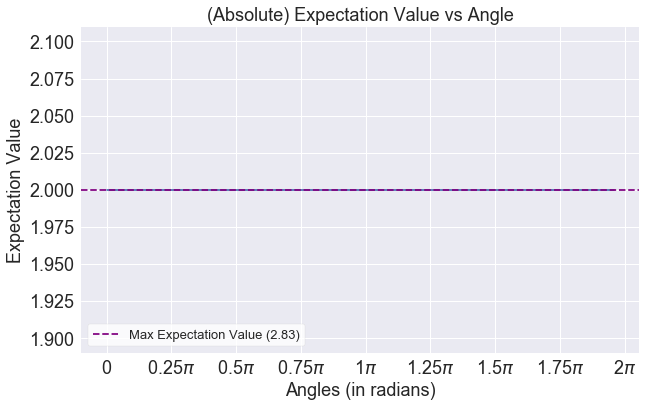

In [30]:
#import seaborn as sns
plt.style.use("seaborn")


fig,ax = plt.subplots(figsize=(10, 6))
ax.plot(angles, expect_vals)
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.4g}$\pi$'.format(val/np.pi) if val !=0 else '0'))
ax.xaxis.set_major_locator(MultipleLocator(base=pi/4))

plt.title('(Absolute) Expectation Value vs Angle', size = 18)
plt.xlabel('Angles (in radians)', size = 18)
plt.ylabel('Expectation Value',  size = 18)

plt.xticks(size = 18)
plt.yticks(size = 18)
plt.axhline(y=max_exp, color='purple', linestyle='--', label = 'Max Expectation Value (2.83)')
plt.legend(loc='lower left', fontsize=13, frameon='true', facecolor='white')
plt.show()



plt.show()

We plot the rotation of the basis on the bloch sphere for visualization purposes

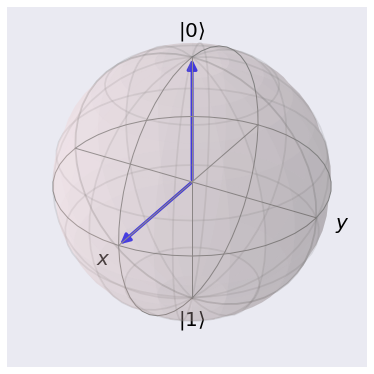

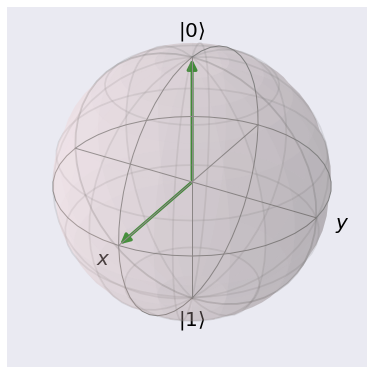

In [31]:
b = qutip.Bloch()

vec_x = np.array([1, 0, 0])
vec_z = np.array([0, 0, 1])
b.add_vectors(vec_x)
b.add_vectors(vec_z)

b.vector_color = ['b']

b.render()
b2 = qutip.Bloch()
vec_x_prime =  vec_z * np.cos(max_angle) - np.sin(max_angle) * vec_x
vec_z_prime =  vec_x * np.cos(max_angle) + np.sin(max_angle) * vec_z


b2.add_vectors(vec_x_prime)
b2.add_vectors(vec_z_prime)

b2.vector_color = ['g']

b2.render()